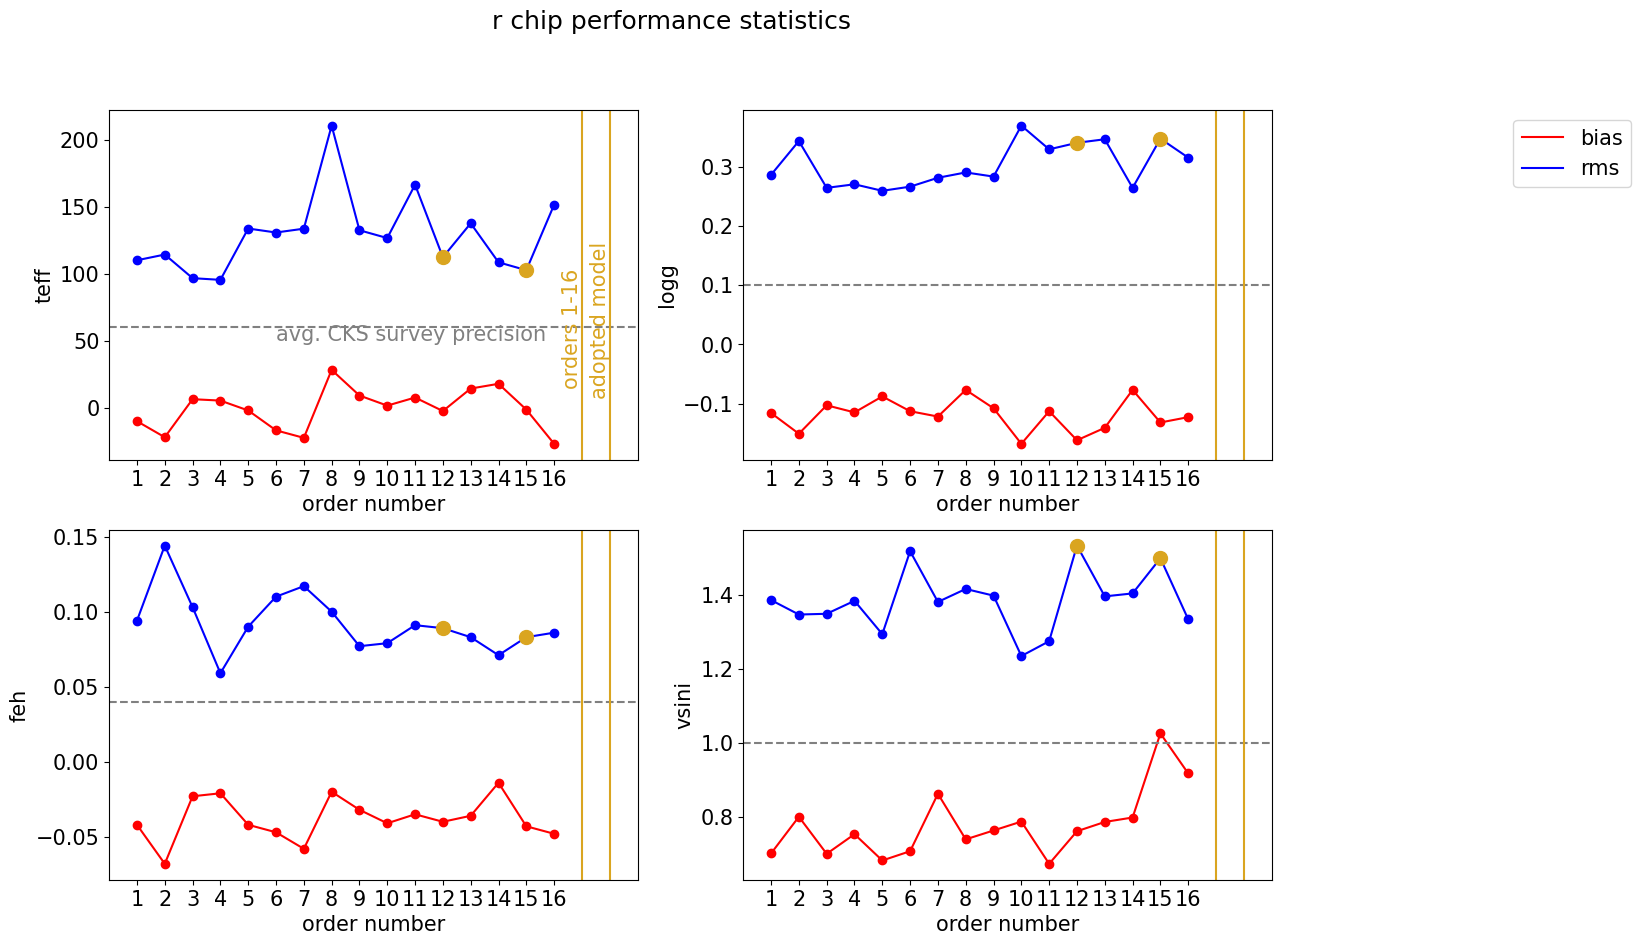

In [2]:
import pandas as pd
from pylab import *
import os
from specmatchemp import SPECMATCHDIR

# load telluric mask from specmatch
mask_table = pd.read_csv(os.path.join(SPECMATCHDIR, 'hires_telluric_mask.csv'))
mask_table = mask_table.query("chip=='rj'")
mask_table = mask_table.rename(columns={"order": "order_idx"})
mask_table['order_n']=[i+1 for i in mask_table.order_idx]
telluric_orders = np.unique(mask_table.order_n.to_numpy())

# load order performance stats
df = pd.read_csv('./data/cannon_models/rchip_order_stats.csv')
df_dwt = df[df.model.str.contains('dwt') & ~df.model.str.contains('iter')]
#df_original = df[df.model.str.contains('original')]

cks_precision = {'teff':60, 'logg':0.1, 'feh':0.04, 'vsini':1}

figure(figsize=(15,10))
rcParams['font.size']=15
#label_strings = ['steff', 'slogg', 'smet', 'svsini']#np.unique(df_dwt.label.to_numpy())
label_strings = ['teff', 'logg', 'feh', 'vsini']
for i in range(len(label_strings)):
    # determine x axis
    x_dwt = np.arange(1,len(np.unique(df_dwt.model))+1)
    #x_original = np.arange(1,len(np.unique(df_original.model))+1)
    
    # label plot
    subplot(2,2,i+1)
    label_str = label_strings[i]
    df_dwt_label = df_dwt.query('label == @label_str')
    #df_original_label = df_original.query('label == @label_str')
    
    # plot bias
    plot(x_dwt, df_dwt_label.bias, 'ro')
    plot(x_dwt, df_dwt_label.bias, 'r-', label='bias')
    #plot(x_original, df_original_label.bias, 'o', color='pink')
    #plot(x_original, df_original_label.bias, '-', color='pink', label='bias, no wavelet filtering')

    # plot rms
    plot(x_dwt, df_dwt_label.rms, 'bo')
    plot(x_dwt, df_dwt_label.rms, 'b-', label='rms')
    #plot(x_original, df_original_label.rms, 'o', color='lightblue')
    #plot(x_original, df_original_label.rms, '-', color='lightblue',label='rms, no wavelet filtering')
    
    # plot cks precision
    axhline(cks_precision[label_str], color='grey', ls='--')

    # flag telluric orders somehow
    for j in range(len(x_dwt)):
        if x_dwt[j] in telluric_orders:
            plot(x_dwt[j], df_dwt_label.rms.to_numpy()[j], 'o', color='goldenrod', ms=10, zorder=3)
    
    # plot line through models trained on multiple orders
    axvline(17, color='goldenrod')
    axvline(18, color='goldenrod')
    
    xticks(ticks=np.arange(1,17,1))
    ylabel(label_str)
    xlabel('order number')
    
    if i==0:
        legend(ncols=1, bbox_to_anchor=(2.9, 1.0))
        text(6,50,'avg. CKS survey precision', color='grey')
        text(16.3,17,'orders 1-16', rotation=90, color='goldenrod')
        text(17.3,10,'adopted model', rotation=90, color='goldenrod')
    
    xlim(0,19)
    suptitle('r chip performance statistics')

In [ ]:
# these just aren't working very well...
# I'm not sure why.